In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

The following function will generate a circuit that satisfies the Deutsch-Josza promise, with a 50/50 chance of being constant or balanced

In [2]:
def dj_query(num_qubits):
    # Create a circuit implementing for a query gate for a random function
    # satisfying the promise for the Deutsch-Jozsa problem.

    qc = QuantumCircuit(num_qubits + 1)

    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # Choose half the possible input strings
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created.
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

The following function creates the Deutsch-Josza circuit, using the quantum circuit implementation of the query gate as an argument

In [39]:
def compile_circuit(f: QuantumCircuit):
    n = f.num_qubits - 1

    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.barrier()
    qc.h(range(n + 1))

    qc.compose(f, inplace=True)

    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

In [40]:
def dj_algorithm(function: QuantumCircuit):
    # Determine if a function is constant or balanced.

    qc = compile_circuit(function)

    display(qc.draw("mpl"))

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

In [37]:
f = dj_query(5)

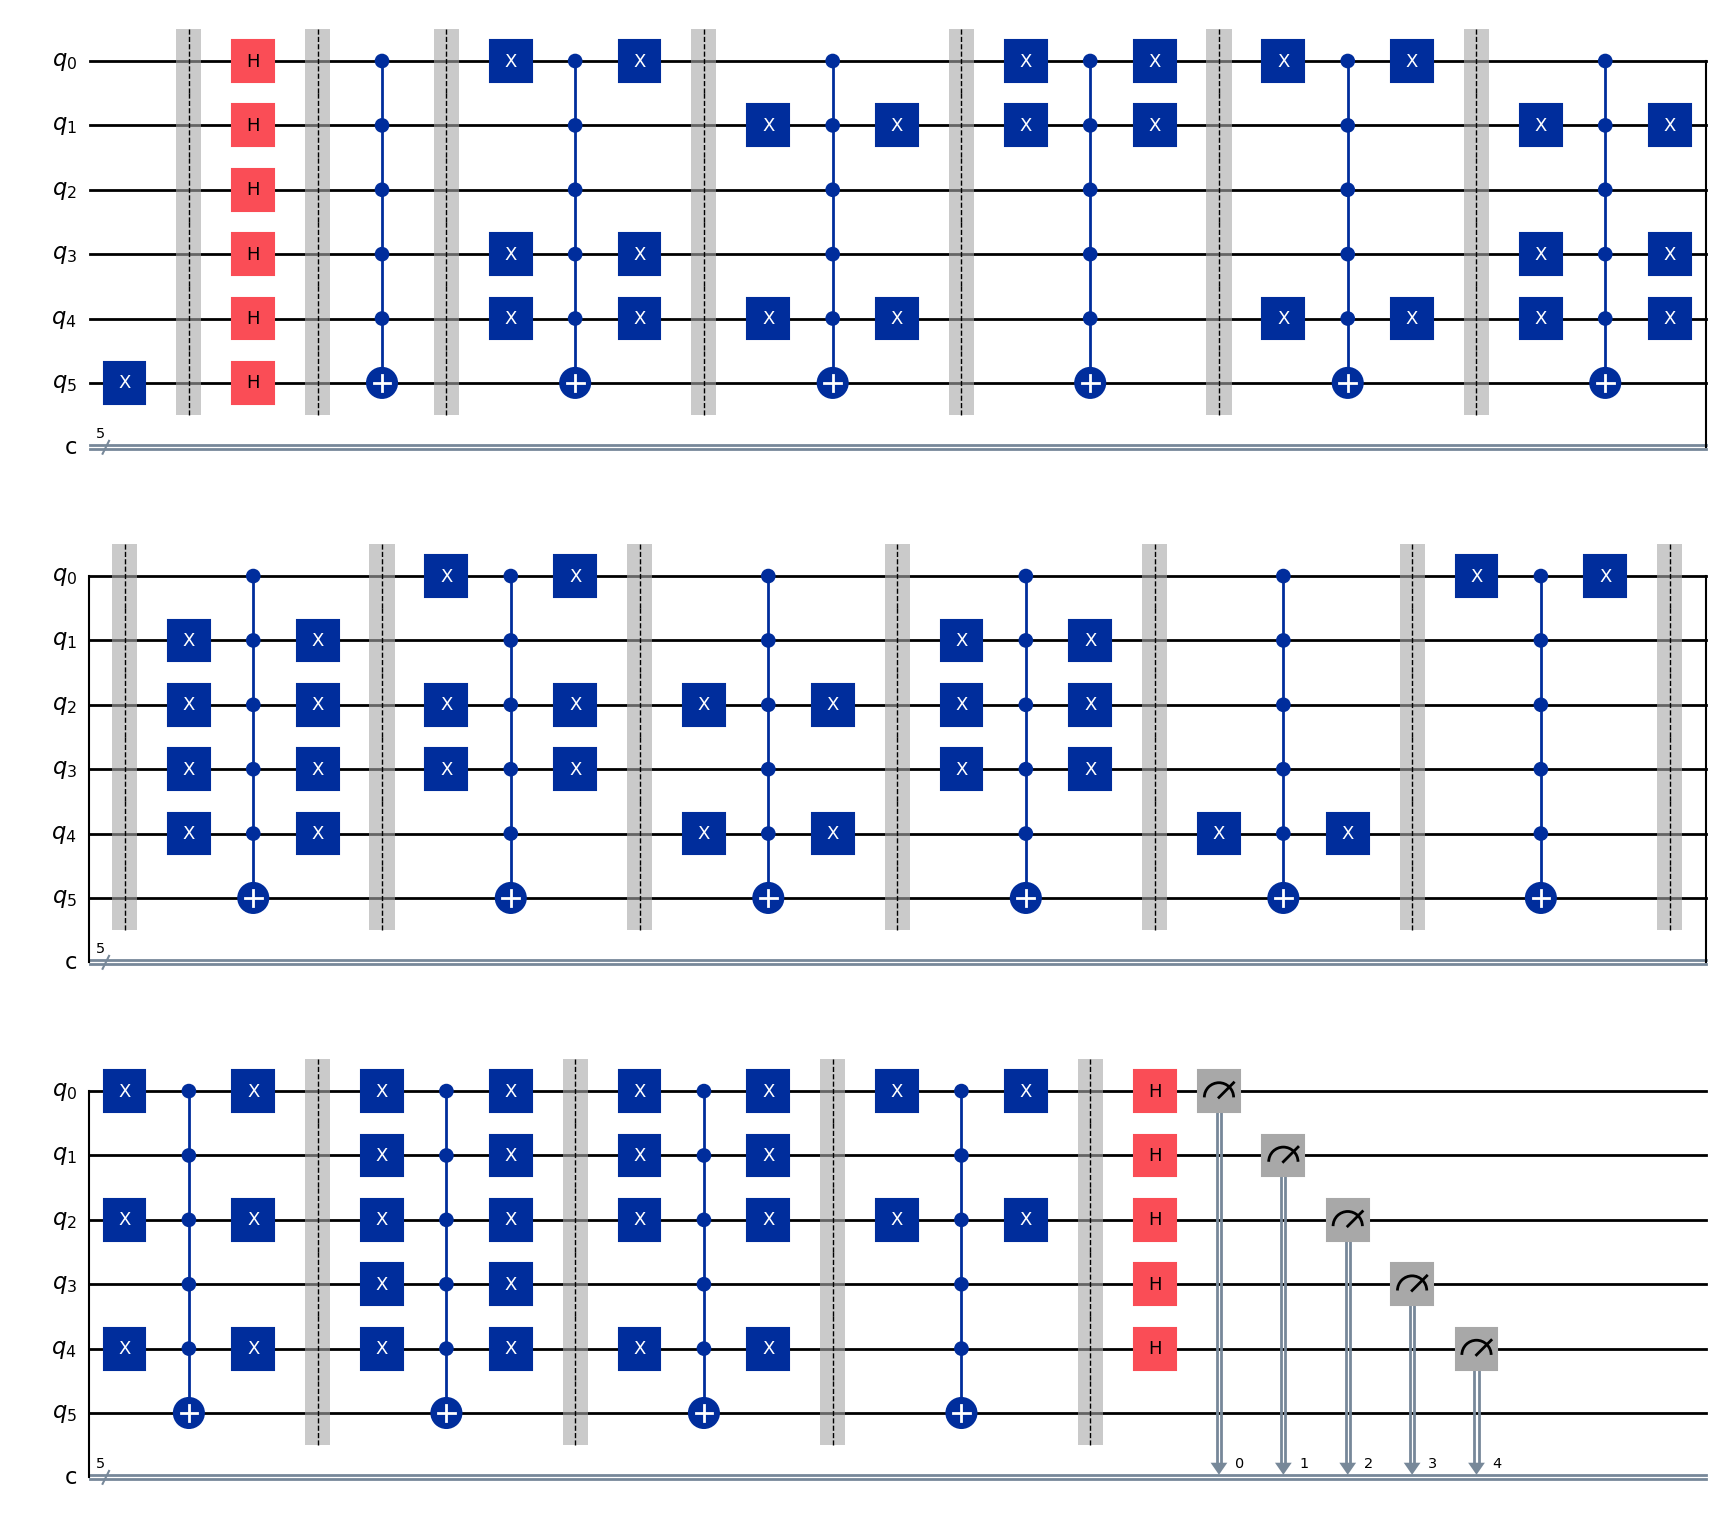

'balanced'

In [41]:
display(dj_algorithm(f))